# Evaluation Project 6 : Loan Application Status

**Project Description:**

**This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.**

Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

We have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import  accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset:
loan=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
# To display top 5 rows:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# To display total number of rows and columns:
loan.shape

(614, 13)

**There are 614 rows and 13 columns.**

In [5]:
# To display all the columns:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Checking datatypes of the columns present:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**There are object and float datatypes present in this given dataset.**

In [7]:
# Finding null values:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**There are some columns , where null values are present . We have to treat these null  values for the project betterment.**

In [8]:
# To get the brief information of dataset:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**As we have to predict the Target Variable , so let's start working on the target variable.**

In [9]:
# Finding the unique values in Target Variable:
loan['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [10]:
# Finding total number of values in Target Variable:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Data Cleaning:

In [11]:
#checking all values of column 'Gender'
loan["Gender"].unique() 

array(['Male', 'Female', nan], dtype=object)

In [12]:
#checking repeated values in "Gender" column through mode
print( loan["Gender"].mode())

0    Male
Name: Gender, dtype: object


In [13]:
#Filling Null Values of "other_fuel1" column in dataset by mode value
loan["Gender"].fillna(loan["Gender"].mode()[0], inplace=True)

In [14]:
#checking all values of column 'Married'
loan["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
#checking repeated values in "Married" column through mode
print( loan["Married"].mode())

0    Yes
Name: Married, dtype: object


In [16]:
#Filling Null Values of "Married" column in dataset by mode value
loan["Married"].fillna(loan["Married"].mode()[0], inplace=True)

In [17]:
#checking all values of column 'Dependents'
loan["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:
#checking repeated values in "Dependents" column through mode
print( loan["Dependents"].mode())

0    0
Name: Dependents, dtype: object


In [19]:
#Filling Null Values of "Dependents" column in dataset by mode value
loan["Dependents"].fillna(loan["Dependents"].mode()[0], inplace=True)

In [20]:
#checking all values of column 'Self_Employed'
loan["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
#checking repeated values in "Self_Employed" column through mode
print( loan["Self_Employed"].mode())

0    No
Name: Self_Employed, dtype: object


In [22]:
#Filling Null Values of "Self_Employed" column in dataset by mode value
loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0], inplace=True)

In [23]:
#checking all values of column 'LoanAmount'
loan["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [24]:
#Filling Null Values of "LoanAmount" column in dataset by mean value
loan["LoanAmount"].fillna(loan["LoanAmount"].mean(), inplace=True)

In [25]:
#checking all values of column 'Loan_Amount_Term'
loan["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
#Filling Null Values of "Loan_Amount_Term" column in dataset by mean value
loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mean(), inplace=True)

In [28]:
#checking all values of column 'Credit_History'
loan["Credit_History"].unique()

array([ 1.,  0., nan])

In [29]:
#Filling Null Values of "Credit_History" column in dataset by mean value
loan["Credit_History"].fillna(loan["Credit_History"].mean(), inplace=True)

**There are some columns which seems irrelevent , so we can drop those columns.**

In [30]:
# The column Loan_ID is the unique ID given to the applicants and it has no relation with our target column. So, we wil drop this column.
loan=loan.drop(columns="Loan_ID", axis=1)

In [31]:
# To verify , if the null values are treated or not:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Great , All the null values are treated . We can go ahead.**

In [32]:
# To display the descriptive statistics of data:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Data Visualization:

In [33]:
# Univariate Analysis:

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

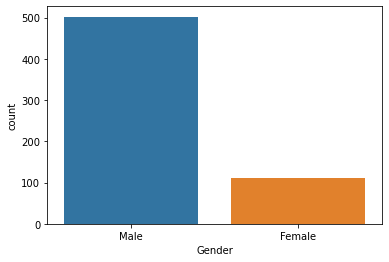

In [34]:
#Count Plot for "Gender" column
print(loan["Gender"].value_counts())

sns.countplot("Gender",data=loan)

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

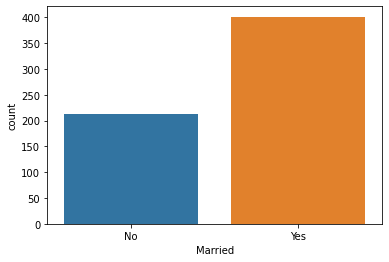

In [35]:
#Count Plot for "Married" column
print(loan["Married"].value_counts())

sns.countplot("Married",data=loan)

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

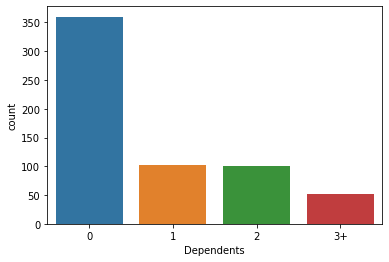

In [36]:
#Count Plot for "Dependents" column
print(loan["Dependents"].value_counts())

sns.countplot("Dependents",data=loan)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

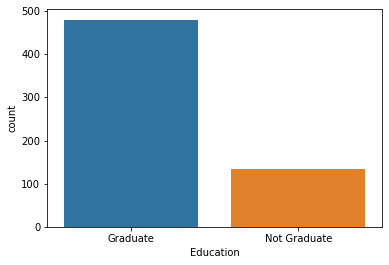

In [37]:
#Count Plot for "Education" column
print(loan["Education"].value_counts())

sns.countplot("Education",data=loan)

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

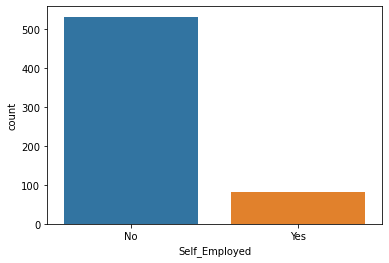

In [38]:
#Count Plot for "Self_Employed" column
print(loan["Self_Employed"].value_counts())

sns.countplot("Self_Employed",data=loan)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

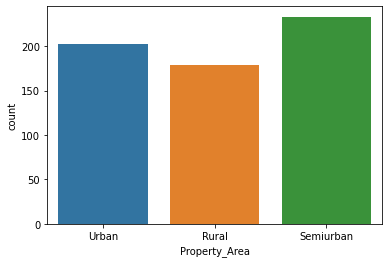

In [39]:
#Count Plot for "Property_Area" column
print(loan["Property_Area"].value_counts())

sns.countplot("Property_Area",data=loan)

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

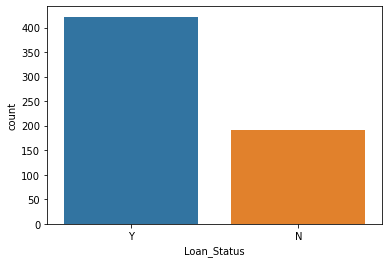

In [40]:
#Count Plot for "Loan_Status" column
print(loan["Loan_Status"].value_counts())

sns.countplot("Loan_Status",data=loan)

In [41]:
# Visualizing continuous columns using "HistPlot":

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

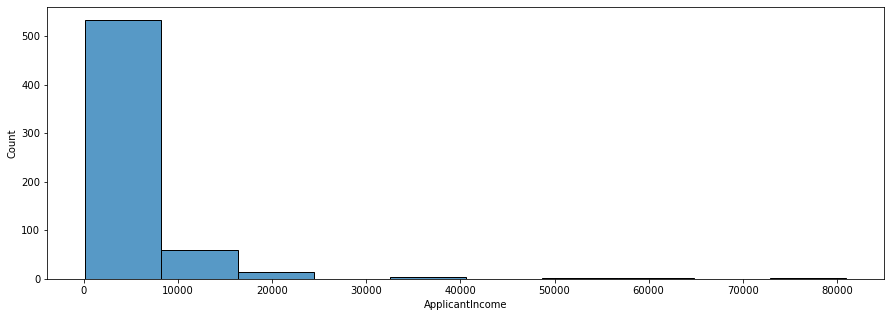

In [42]:
#Histplot for "ApplicantIncome" column
plt.figure(figsize=(15,5))
sns.histplot(x='ApplicantIncome',data=loan,bins=10)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

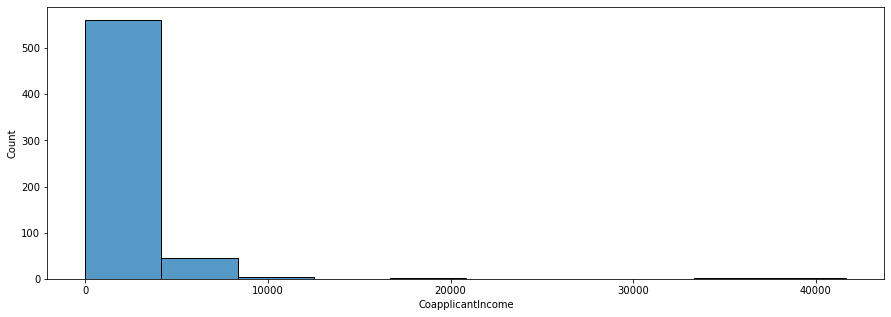

In [43]:
#Histplot for "CoapplicantIncome" column
plt.figure(figsize=(15,5))
sns.histplot(x='CoapplicantIncome',data=loan,bins=10)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

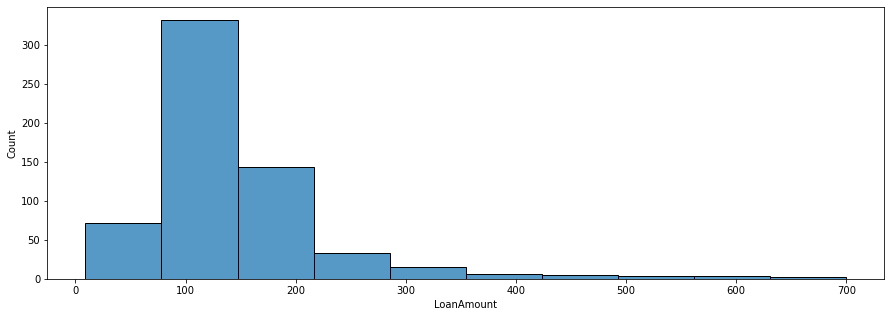

In [44]:
#Histplot for "LoanAmount" column
plt.figure(figsize=(15,5))
sns.histplot(x='LoanAmount',data=loan,bins=10)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

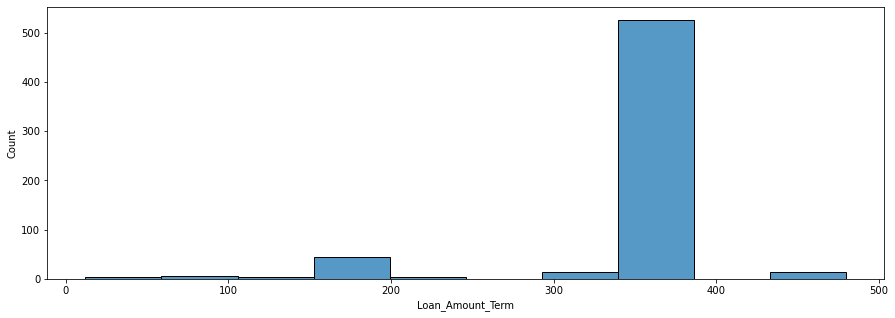

In [45]:
#Histplot for "Loan_Amount_Term" column
plt.figure(figsize=(15,5))
sns.histplot(x='Loan_Amount_Term',data=loan,bins=10)

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

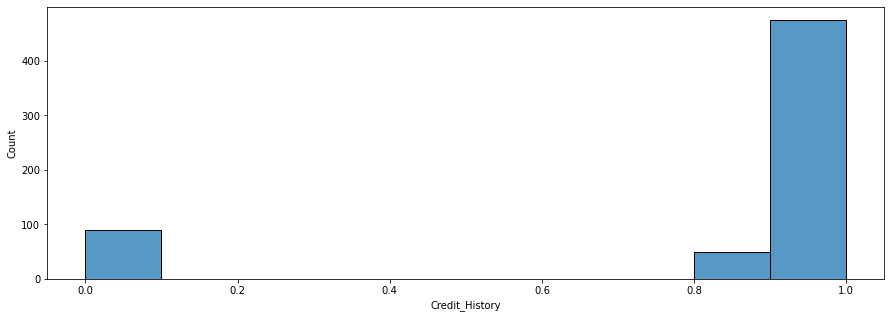

In [46]:
#Histplot for "Credit_History" column
plt.figure(figsize=(15,5))
sns.histplot(x='Credit_History',data=loan,bins=10)

In [47]:
# Bivariate Analysis:

<AxesSubplot:xlabel='Gender', ylabel='count'>

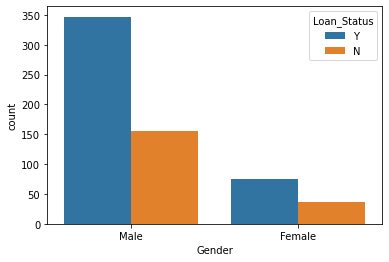

In [48]:
#Count Plot for comparision between "Gender" column and "Loan_Status" column
sns.countplot("Gender",data=loan, hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

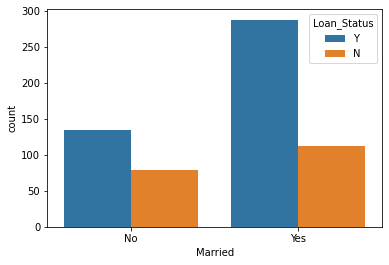

In [49]:
#Count Plot for comparision between "Married" column and "Loan_Status" column
sns.countplot("Married",data=loan, hue='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

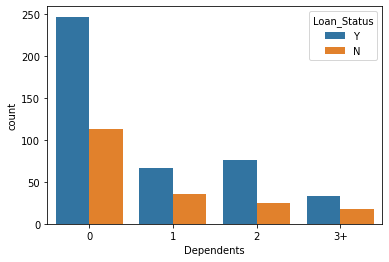

In [50]:
#Count Plot for comparision between "Dependents" column and "Loan_Status" column
sns.countplot("Dependents",data=loan, hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

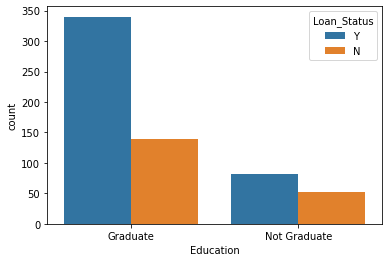

In [51]:
#Count Plot for comparision between "Education" column and "Loan_Status" column
sns.countplot("Education",data=loan, hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

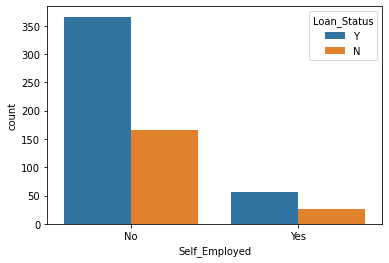

In [52]:
#Count Plot for comparision between "Self_Employed" column and "Loan_Status" column
sns.countplot("Self_Employed",data=loan, hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

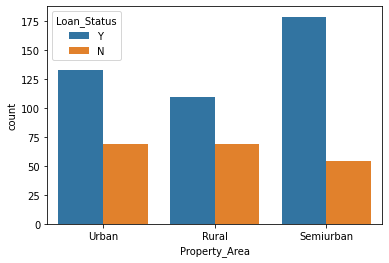

In [53]:
#Count Plot for comparision between "Property_Area" column and "Loan_Status" column
sns.countplot("Property_Area",data=loan, hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

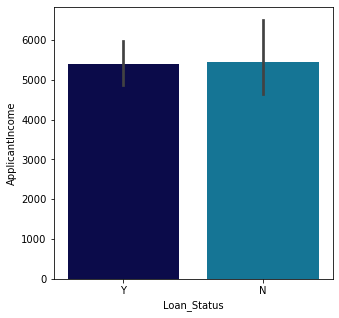

In [54]:
#Bar Plot for comparision between "ApplicantIncome" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='ApplicantIncome',data=loan, palette='ocean')

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

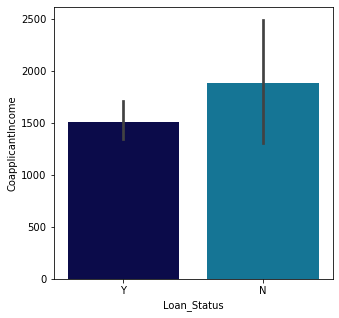

In [55]:
#Bar Plot for comparision between "CoapplicantIncome" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='CoapplicantIncome',data=loan, palette='ocean')

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

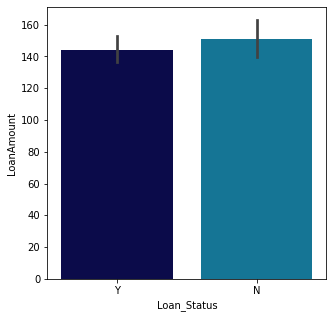

In [56]:
#Bar Plot for comparision between "LoanAmount" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='LoanAmount',data=loan, palette='ocean')

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

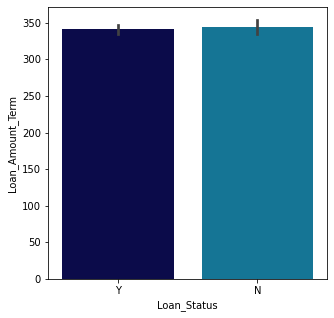

In [57]:
#Bar Plot for comparision between "Loan_Amount_Term" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='Loan_Amount_Term',data=loan, palette='ocean')

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

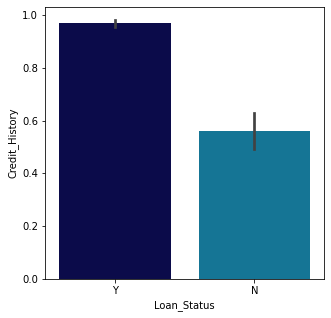

In [58]:
#Bar Plot for comparision between "Credit_History" and "Loan_Status" column
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status', y='Credit_History',data=loan, palette='ocean')

# Label Encoding:

**As we observed that there are some columns which are of object datatype . So , we have to convert the categorical and text data into numeric.**

In [59]:
encoder=LabelEncoder()

In [60]:
loan['Gender'] = encoder.fit_transform(loan['Gender'])
loan['Married'] = encoder.fit_transform(loan['Married'])
loan['Dependents'] = encoder.fit_transform(loan['Dependents'])
loan['Education'] = encoder.fit_transform(loan['Education'])
loan['Self_Employed'] = encoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = encoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = encoder.fit_transform(loan['Loan_Status'])

In [61]:
# To verify , if the datatype converted or not:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Correlation:

In [62]:
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


In [63]:
loan.corr()["Loan_Status"].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

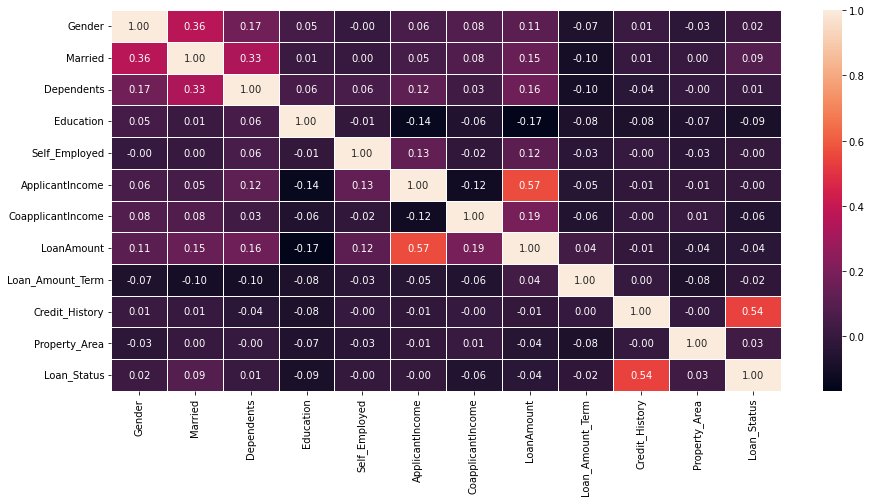

In [64]:
plt.figure(figsize=(15,7))
sns.heatmap(loan.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

# Outliers Detection:

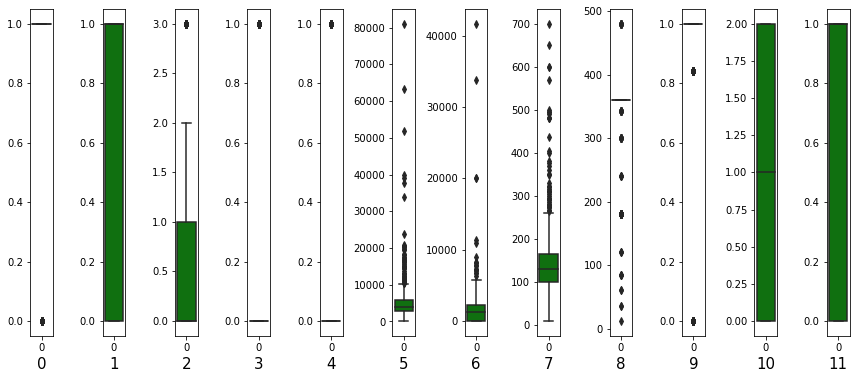

In [66]:
columns=loan.columns.values
ncol=12
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(columns)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=loan[columns[column]],color='green',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

**We observed that the Outliers present in columns: 'Gender', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'.**

In [67]:
# Removing Outliers using Z score method :

In [68]:
outliers = loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

z=np.abs(zscore(outliers))

# Creating new dataframe
loan_appl = loan[(z<3).all(axis=1)]
loan_appl.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [69]:
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.45164
1,0.134412,0.038732,0.219273,0.279851,0.45164
2,0.393747,0.554487,0.957641,0.279851,0.45164
3,0.462062,0.251980,0.314547,0.279851,0.45164
4,0.097728,0.554487,0.064454,0.279851,0.45164


In [70]:
loan_appl.shape

(577, 12)

In [71]:
# Finding number of dropped rows :
loan.shape[0]-loan_appl.shape[0]

37

In [72]:
# To find the data loss:
loss=(614-577)/614*100
print(loss,"%")

6.026058631921824 %


In [73]:
# Checking for skewness:
loan_appl.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

**There is skewness present in most of the columns.**

# Removing skewness using yeo-johnson method

In [75]:
columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
loan_appl[columns]=power_transform(loan_appl[columns],method='yeo-johnson')
loan_appl[columns]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.681780,-1.122446,0.316078,0.142609,0.515236
1,0.234783,0.744117,-0.015871,0.142609,0.515236
2,-0.527201,-1.122446,-1.443112,0.142609,0.515236
3,-0.791972,0.895786,-0.169860,0.142609,0.515236
4,0.728848,-1.122446,0.221481,0.142609,0.515236
...,...,...,...,...,...
609,-0.587375,-1.122446,-1.301481,0.142609,0.515236
610,0.035386,-1.122446,-2.321865,-2.559206,0.515236
611,1.281658,0.173344,1.838099,0.142609,0.515236
612,1.164426,-1.122446,0.961555,0.142609,0.515236


In [76]:
# To verify , if the skewness reduced or not:
loan_appl.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Data Preprocessing:

**Splitting the training and testing dataset:**

In [77]:
x=loan_appl.drop("Loan_Status",axis=1)
y=loan_appl["Loan_Status"]

In [78]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.316078,0.142609,0.515236,2
1,1,1,1,0,0,0.234783,0.744117,-0.015871,0.142609,0.515236,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.443112,0.142609,0.515236,2
3,1,1,0,1,0,-0.791972,0.895786,-0.169860,0.142609,0.515236,2
4,1,0,0,0,0,0.728848,-1.122446,0.221481,0.142609,0.515236,2


In [79]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [80]:
x.shape, y.shape

((577, 11), (577,))

In [81]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

**Data is not balanced yet . Let's use oversampling using SMOTE to balance the data.**

In [82]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [83]:
Smote= SMOTE()
x, y = Smote.fit_resample(x,y)

In [84]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

**Great ,data is balanced now.**

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

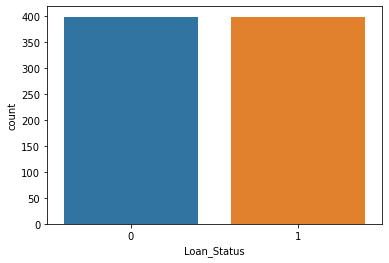

In [85]:
#checking through visualization also
sns.countplot(y)

In [86]:
# Let's scale the data using StandardScaler:

In [87]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [88]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.534738,-1.194500,-0.682538,-0.507448,-0.324893,0.703206,-1.074617,0.321092,0.111856,0.634941,1.291583
1,0.534738,0.837171,0.336787,-0.507448,-0.324893,0.244955,0.788944,-0.023384,0.111856,0.634941,-1.206838
2,0.534738,0.837171,-0.682538,-0.507448,3.077935,-0.536213,-1.074617,-1.504485,0.111856,0.634941,1.291583
3,0.534738,0.837171,-0.682538,1.970643,-0.324893,-0.807651,0.940370,-0.183185,0.111856,0.634941,1.291583
4,0.534738,-1.194500,-0.682538,-0.507448,-0.324893,0.751459,-1.074617,0.222924,0.111856,0.634941,1.291583


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

In [90]:
x.shape, y.shape

((796, 11), (796,))

In [91]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((557, 11), (557,), (239, 11), (239,))

**Logistic Regression**

In [92]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.7824267782426778
confusion_matrix: 
 [[ 77  34]
 [ 18 110]]
classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.69      0.75       111
           1       0.76      0.86      0.81       128

    accuracy                           0.78       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.78      0.78       239



In [93]:
# Let's use Classification Algorithms:

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN

**Random Forest Classifier**

In [95]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.803347280334728
confusion_matrix: 
 [[ 82  29]
 [ 18 110]]
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       111
           1       0.79      0.86      0.82       128

    accuracy                           0.80       239
   macro avg       0.81      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



**Decision Tree Classifier**

In [96]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.7489539748953975
confusion_matrix: 
 [[87 24]
 [36 92]]
classification_report: 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       111
           1       0.79      0.72      0.75       128

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239



**Support Vector Machine Classifier**

In [97]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.7573221757322176
confusion_matrix: 
 [[ 62  49]
 [  9 119]]
classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.56      0.68       111
           1       0.71      0.93      0.80       128

    accuracy                           0.76       239
   macro avg       0.79      0.74      0.74       239
weighted avg       0.78      0.76      0.75       239



**KNN Classifier**

In [98]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.7531380753138075
confusion_matrix: 
 [[ 76  35]
 [ 24 104]]
classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       111
           1       0.75      0.81      0.78       128

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239



In [99]:
# Finding cross validation score for all the models:

In [100]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.7299056603773585


In [101]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.8166037735849058


In [102]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.7400157232704403


In [103]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.7311556603773585


In [104]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.7575157232704403


# Hyperparameter Tuning:

In [105]:
parameters={
    'max_depth': [2,3,4],
    'max_features': ['auto', 'sqrt'],
    'max_samples':[0,0.1,0.001,1],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300,500]}
CV_RFC = GridSearchCV(rfc, param_grid= parameters, scoring= 'accuracy', cv= 5)

In [106]:
CV_RFC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [0, 0.1, 0.001, 1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [107]:
CV_RFC.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 100}

In [108]:
loan_status=RandomForestClassifier(n_estimators=300, criterion='gini',max_depth=2, max_features='auto',max_samples=0.1)
loan_status.fit(x_train,y_train)
predict=loan_status.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,predict))
print("confusion_matrix: \n",confusion_matrix(y_test,predict))
print("classification_report: \n",classification_report(y_test,predict))

accuracy score:  0.7615062761506276
confusion_matrix: 
 [[ 62  49]
 [  8 120]]
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.56      0.69       111
           1       0.71      0.94      0.81       128

    accuracy                           0.76       239
   macro avg       0.80      0.75      0.75       239
weighted avg       0.79      0.76      0.75       239



In [110]:
acc=accuracy_score(y_test,predict)
print(acc*100)

76.15062761506276


In [111]:
# Saving the model:
import pickle
filename='Loan_Status_Prediction.pickle'
pickle.dump(CV_RFC,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [112]:
# Comparing actual and predicted values:
a =np.array(y_test)
predicted=np.array(CV_RFC.predict(x_test))
Loan_Status_Prediction=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Loan_Status_Prediction

,Orginal,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
234,0,0
235,1,1
236,0,1
237,0,0


In [113]:
# Saving the output in csv format:
Output =Loan_Status_Prediction.to_csv('Loan_Status_Prediction.csv')
Output

# Conclusion:

**We got the great accuracy score using random forest classifier . Achieving this much of accuracy indicates that model is performing good and also we observed that the actual and predicted values are approximately same.**